In [ ]:
# Road Transport Indicators in Azerbaijan (Transport Category, IDDA Portal)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)


In [ ]:
# 2. Load dataset from IDDA Transport category
# Dataset: "Avtomobil nəqliyyatı üzrə əsas göstəricilər (natura ifadəsində)"
# Category: Transport (Nəqliyyat)

file_path = "/content/avtomobil-nqliyyat-uzr-sas-gostricilr-natura-ifadsind-dt_bj_055 (1).csv"
df = pd.read_csv(file_path)

df.head()
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             30 non-null     int64  
 1   Unnamed: 1                                       0 non-null      float64
 2   Yük daşınmışdır (min ton)                        30 non-null     float64
 3   fiziki şəxslər tərəfindən (min ton)              30 non-null     float64
 4   Yük dövriyyəsi (mln ton km)                      30 non-null     float64
 5   fiziki şəxslər tərəfindən (mln ton km)           30 non-null     float64
 6   Sərnişin daşınmışdır (min sərnişin)              30 non-null     float64
 7   şəhərlərarası (min sərnişin)                     30 non-null     object 
 8   şəhərdaxili (min sərnişin)                       30 non-null     object 
 9   şəhərətrafı (min sərnişin)        

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,30.0,NaN,NaN,NaN,2009.5,8.803408,1995.0,2002.25,2009.5,2016.75,2024.0
Unnamed: 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yük daşınmışdır (min ton),30.0,NaN,NaN,NaN,90273.833333,45528.549345,13634.0,55071.0,97063.5,127958.5,155318.0
fiziki şəxslər tərəfindən (min ton),30.0,NaN,NaN,NaN,58987.0,29838.447221,0.0,43377.75,65250.0,82199.0,102344.0
Yük dövriyyəsi (mln ton km),30.0,NaN,NaN,NaN,9413.6,5208.119156,480.0,5710.75,9686.0,13411.25,17531.0
fiziki şəxslər tərəfindən (mln ton km),30.0,NaN,NaN,NaN,6008.866667,2931.277016,0.0,5238.5,6097.0,7921.75,10541.0
Sərnişin daşınmışdır (min sərnişin),30.0,NaN,NaN,NaN,1155701.2,435372.375841,486009.0,772510.0,1107397.0,1590210.75,1846009.0
şəhərlərarası (min sərnişin),30,28,-,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
şəhərdaxili (min sərnişin),30,28,-,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
şəhərətrafı (min sərnişin),30,28,-,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df = df.rename(columns={
    "Year": "Year",
    "Yük daşınmışdır (min ton)": "Freight_thousand_tons",
    "fiziki şəxslər tərəfindən (min ton)": "Freight_by_individuals_thousand_tons",
    "Yük dövriyyəsi (mln ton km)": "Freight_turnover_mln_ton_km",
    "fiziki şəxslər tərəfindən (mln ton km)": "Freight_turnover_by_individuals_mln_ton_km",
    "Sərnişin daşınmışdır (min sərnişin)": "Passengers_thousand",
    "şəhərlərarası (min sərnişin)": "Intercity_passengers_thousand",
    "şəhərdaxili (min sərnişin)": "Intracity_passengers_thousand",
    "şəhərətrafı (min sərnişin)": "Suburban_passengers_thousand",
    "Sərnişin dövriyyəsi (mln sərnişin/km)": "Passenger_turnover_mln_pass_km",
    "fiziki şəxslər tərəfindən (mln sərnişin/km)": "Passenger_turnover_by_individuals_mln_pass_km",
    "Bir ton yükün orta daşınma məsafəsi (kilometr)": "Avg_distance_per_ton_km",
    "Bir sərnişinin orta daşınma məsafəsi (kilometr)": "Avg_distance_per_passenger_km",
    "İşçilərin orta illik sayı (nəfər)": "Avg_annual_employees"
})

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

df.head()


,Year,Freight_thousand_tons,Freight_by_individuals_thousand_tons,Freight_turnover_mln_ton_km,Freight_turnover_by_individuals_mln_ton_km,Passengers_thousand,Intercity_passengers_thousand,Intracity_passengers_thousand,Suburban_passengers_thousand,Passenger_turnover_mln_pass_km,Passenger_turnover_by_individuals_mln_pass_km,Avg_distance_per_ton_km,Avg_distance_per_passenger_km,Avg_annual_employees
0,2024,143477.0,85588.0,13446.0,7490.0,1846009.0,-,-,-,28425.0,11876.0,93.7,15.4,22223.0
1,2023,134216.0,79817.0,12450.0,6961.0,1694104.0,-,-,-,25645.0,10885.0,92.8,15.1,23395.0
2,2022,126025.0,74562.0,11603.0,6476.0,1405021.0,31731.0,1076250.0,297040.0,21119.0,9377.0,92.1,15.0,22771.0
3,2021,112522.0,67907.0,9425.0,5507.0,1119944.0,25831.0,882361.0,211752.0,16892.0,8903.0,83.8,15.1,21494.0
4,2020,111518.0,73176.0,8801.0,5249.0,1100201.0,29864.0,833957.0,236380.0,16974.0,10627.0,78.9,15.4,22454.0


In [ ]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

for col in df.columns:
  if col != "Year":
    df[col]  = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["Year"]).sort_values("Year").reset_index(drop=True)

df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           30 non-null     Int64  
 1   Freight_thousand_tons                          30 non-null     float64
 2   Freight_by_individuals_thousand_tons           30 non-null     float64
 3   Freight_turnover_mln_ton_km                    30 non-null     float64
 4   Freight_turnover_by_individuals_mln_ton_km     30 non-null     float64
 5   Passengers_thousand                            30 non-null     float64
 6   Intercity_passengers_thousand                  28 non-null     float64
 7   Intracity_passengers_thousand                  28 non-null     float64
 8   Suburban_passengers_thousand                   28 non-null     float64
 9   Passenger_turnover_mln_pass_km                 30 non-nu

,count,mean,std,min,25%,50%,75%,max
Year,30.0,2009.5,8.803408,1995.0,2002.25,2009.5,2016.75,2024.0
Freight_thousand_tons,30.0,90273.833333,45528.549345,13634.0,55071.0,97063.5,127958.5,155318.0
Freight_by_individuals_thousand_tons,30.0,58987.0,29838.447221,0.0,43377.75,65250.0,82199.0,102344.0
Freight_turnover_mln_ton_km,30.0,9413.6,5208.119156,480.0,5710.75,9686.0,13411.25,17531.0
Freight_turnover_by_individuals_mln_ton_km,30.0,6008.866667,2931.277016,0.0,5238.5,6097.0,7921.75,10541.0
Passengers_thousand,30.0,1155701.2,435372.375841,486009.0,772510.0,1107397.0,1590210.75,1846009.0
Intercity_passengers_thousand,28.0,30076.678571,15125.575461,0.0,19952.25,29650.0,42977.0,52472.0
Intracity_passengers_thousand,28.0,789607.535714,365272.42215,0.0,553759.5,779265.0,1090773.0,1342256.0
Suburban_passengers_thousand,28.0,256100.678571,107583.28991,0.0,193767.25,236534.0,337848.25,418530.0
Passenger_turnover_mln_pass_km,30.0,16004.933333,7144.319257,4664.0,9667.5,15962.0,22714.0,28425.0


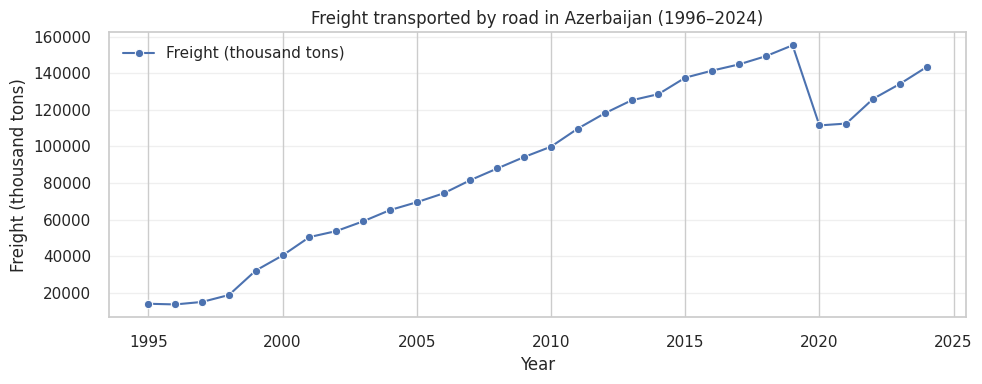

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="Year", y="Freight_thousand_tons", marker="o", label="Freight (thousand tons)")
plt.title("Freight transported by road in Azerbaijan (1996–2024)")
plt.xlabel("Year")
plt.ylabel("Freight (thousand tons)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

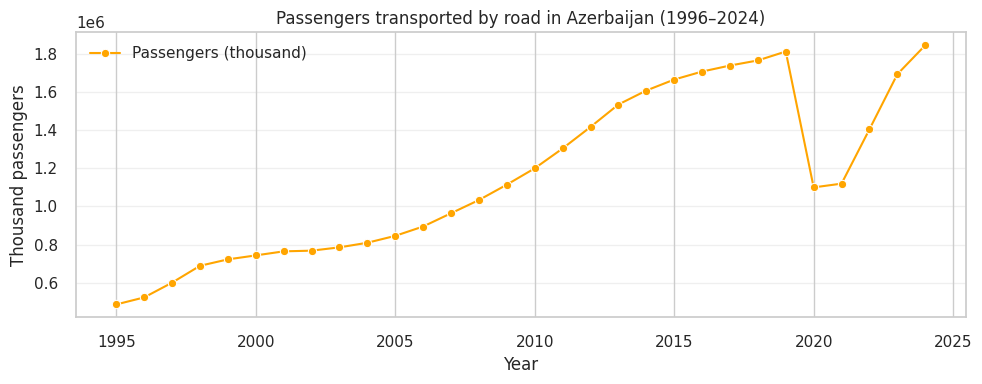

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="Year", y="Passengers_thousand", marker="o", color="orange", label="Passengers (thousand)")
plt.title("Passengers transported by road in Azerbaijan (1996–2024)")
plt.xlabel("Year")
plt.ylabel("Thousand passengers")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.line(
    df,
    x="Year",
    y=["Freight_thousand_tons", "Passengers_thousand"],
    markers=True,
    title="Road Freight and Passenger Transport in Azerbaijan (1996–2024)",
    labels={"value": "Amount", "variable": "Indicator"}
)
fig.show()
